In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
books_html = soup.find_all("article", class_="product_pod")
len(books_html)

20

## Parsing _one_ book

In [7]:
first_book = books_html[0]
first_book 

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [11]:
# TITLE 
book_title = first_book.h3.a.attrs["title"]
book_title

'A Light in the Attic'

In [16]:
# PRICE
book_price = float(first_book.find("p", class_="price_color").string.lstrip("£"))
book_price

51.77

In [17]:
# RATING
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html.attrs['class']

['star-rating', 'Three']

In [21]:
def parse_rating(rating_classes):
    NUMBERS = { 'one':1,
              'two':2,
              'three':3,
              'four': 4, 
              'five': 5
             }
    
    return NUMBERS.get(rating_classes[-1].lower(), 0)

In [23]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [33]:
def parse_all_books(url):
    
    response = requests.get(url)
    
    soup = BeautifulSoup(response.content, "html.parser") 
    
    all_books = soup.find_all("article", class_="product_pod")
    
    books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
    
    for book in all_books:
        books_dict["Title"].append(book.h3.a.attrs["title"])
        books_dict["Price"].append(float(book.find("p", class_="price_color").string.lstrip("£")))
        books_dict["Rating"].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))
    
    return books_dict
        
books_dict = parse_all_books("http://books.toscrape.com/catalogue/page-1.html")
print(len(books_dict)) # You should have 3 key:value pairs
print(len(books_dict["Title"])) # Each value should contain 20 elements from the 20 books, as many as on the web page!

3
20


In [34]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


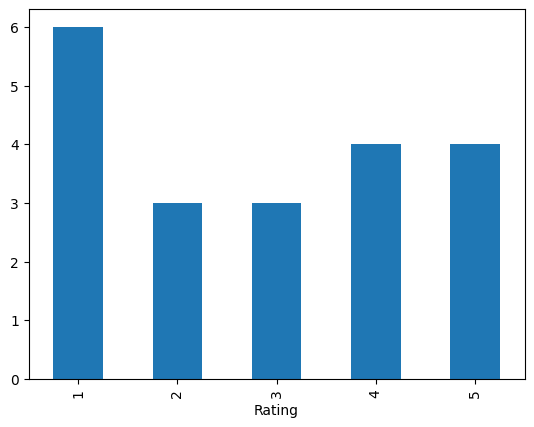

In [35]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar");

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/laurameyer/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/laurameyer/code/lewagon/02-Data-Toolkit/02-Data-Sourcing/book_scraping/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 5 items

test_books.py::TestBooks::test_books_df_columns_name PASSED              [ 20%]
test_books.py::TestBooks::test_books_df_columns_size PASSED              [ 40%]
test_books.py::TestBooks::test_first_book_price PASSED                   [ 60%]
test_books.py::TestBooks::test_first_book_rating PASSED                  [ 80%]
test_books.py::TestBooks::test_first_book_title PASSED                   [100%]

============================== 5 passed in 1.39s ===============================


💯 You can commit your code:

git add tests/books.pickle

git commit -m 'Completed books step'

git push ori

## Going through all the pages of the catalogue

In [51]:
all_books_dict  = { 'Title': [], 'Price': [], 'Rating': [] }
MAX_PAGE = 3

for page in range(1, MAX_PAGE + 1):
     books = parse_all_books(f"http://books.toscrape.com/catalogue/page-{page}.html")
     for key, value in books.items():
        all_books_dict[key].extend(value)

len(all_books_dict["Title"])

60

In [52]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
55,The Torch Is Passed: A Harding Family Story,19.09,1
56,The Secret of Dreadwillow Carse,56.13,1
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1
58,The Past Never Ends,56.50,4
59,The Natural History of Us (The Fine Art of Pre...,45.22,3


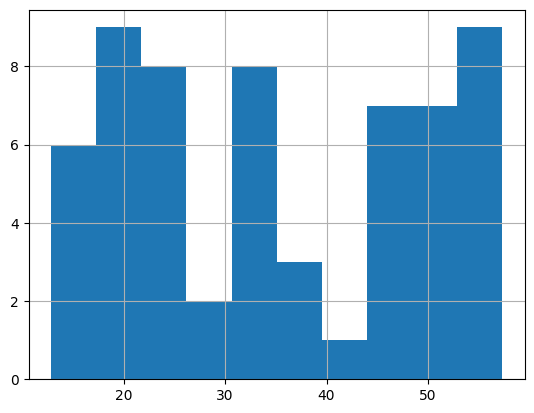

In [54]:
all_books_df["Price"].hist();

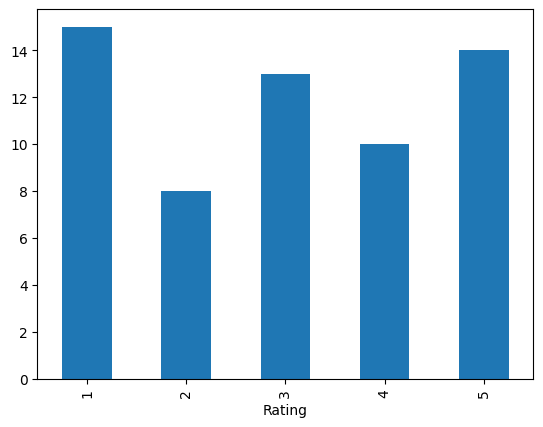

In [56]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar");

In [57]:
all_books_df.to_csv("books.csv")